In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook, tnrange

C:\Users\katal\Documents\ProgramsPackages\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# reading data
df = pd.read_csv('kc_house_data.csv')

### Usually, one should do EDA at first, but assuming that this is a toy dataset I'm skipping it

In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,21603,21604,21605,21606,21607,21608,21609,21610,21611,21612
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160,...,7852140040,9834201367,3448900210,7936000429,2997800021,263000018,6600060120,1523300141,291310100,1523300157
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000,20140512T000000,20140627T000000,20150115T000000,20150415T000000,20150312T000000,...,20140825T000000,20150126T000000,20141014T000000,20150326T000000,20150219T000000,20140521T000000,20150223T000000,20140623T000000,20150116T000000,20141015T000000
price,221900,538000,180000,604000,510000,1.225e+06,257500,291850,229500,323000,...,507250,429000,610685,1.0075e+06,475000,360000,400000,402101,400000,325000
bedrooms,3,3,2,4,3,4,3,3,3,3,...,3,3,4,4,3,3,4,2,3,2
bathrooms,1,2.25,1,3,2,4.5,2.25,1.5,1,2.5,...,2.5,2,2.5,3.5,2.5,2.5,2.5,0.75,2.5,0.75
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890,...,2270,1490,2520,3510,1310,1530,2310,1020,1600,1020
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560,...,5536,1126,6023,7200,1294,1131,5813,1350,2388,1076
floors,1,2,1,1,1,1,2,1,1,2,...,2,3,2,2,2,3,2,2,2,2
waterfront,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#price = w1*bedrooms + w2*bathrooms+w3...

SyntaxError: invalid syntax (<ipython-input-5-5cc7f343ad21>, line 1)

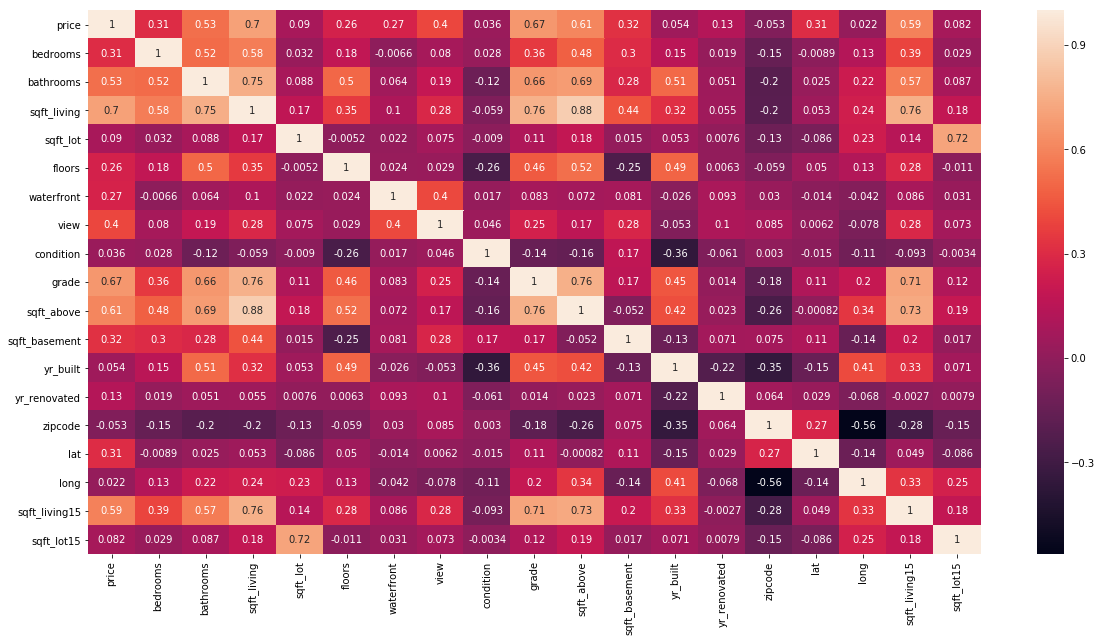

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df.iloc[:, 2:].corr(), annot=True)

In [6]:
x,y = df.drop(['id','date','price'], axis=1), df['price']

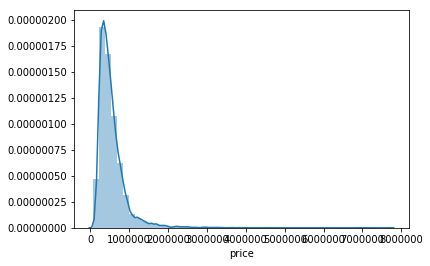

In [7]:
sns.distplot(y)

In [8]:
# Applying log transformation
y = np.log(y)

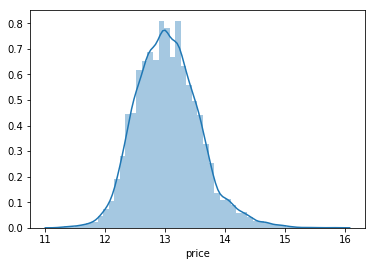

In [9]:
sns.distplot(y)

In [10]:
# Spliting into train/test sets
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3, shuffle=False)

In [11]:
# Scaling data
ss = StandardScaler()
train_x = ss.fit_transform(train_x) # We should call fit_transform only on train
test_x = ss.transform(test_x)

In [12]:
def mse(y,y_pred):
    return np.sum((y - y_pred)**2)/(len(y)) 

In [13]:
from tqdm import tqdm_notebook, tnrange

In [14]:
class SGDreg():
    def __init__(self, lr = 1e-3, n_epochs = 5, random_state=17):
        self.lr = lr
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.mse_hist = []
        self.weights = []
    
    def fit(self, x, y):
        np.random.seed(self.random_state)
        x = np.hstack((np.ones((x.shape[0],1)), x))
        w = np.zeros((x.shape[1]))
        for n in tnrange(self.n_epochs, desc='Epochs'):
            for i in tqdm_notebook(range(x.shape[0]), desc='SGD inner loop'):
                w = w - x[i]*self.lr*(-2*(y[i] - np.dot(x[i],w)))
                
                mse = mean_squared_error(y,np.matmul(x,w.T))
                self.mse_hist.append(mse)
                self.weights.append(w)
        self.w = self.weights[np.argmin(self.mse_hist)]
            
    def predict(self, x):
        x = np.hstack((np.ones((x.shape[0],1)), x))
        return x@self.w

In [15]:
s = SGDreg(n_epochs = 1)

In [18]:
s.fit(train_x, train_y)

In [ ]:
import gc
gc.collect()

In [22]:
s.mse_hist[-1]

0.06450696393786476

In [23]:
mse(s.predict(test_x), test_y)

0.06466010822348524

In [17]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(s.predict(test_x), test_y[:, None])

In [ ]:
!jupyter nbconvert --to script Lin_reg.ipynb

In [19]:
# Cross val

In [ ]:
from sklearn.linera_model import LinearRegression

In [28]:
from sklearn.linear_model import SGDRegressor

In [21]:
from sklearn.model_selection import cross_val_score

In [29]:
model2 = SGDRegressor()

In [31]:
cross_val_score(model2, train_x, train_y, cv=5)

array([0.77980492, 0.76038422, 0.76590464, 0.77515268, 0.76211711])